In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_narrow.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

{'v_half_act': -24.89421646776881, 'gv_slope': 6.149542546425929, 'v_half_ssi': -54.8726380043441, 'ssi_slope': 7.056306477954598, 'tau0': 0.4231792491949431, 'peak_amp': -0.29202235337531235, 'time_to_peak': 5.20000000000004}


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std    	min      	max    
1  	500   	12346.7	13934.5	0.162051 	47984.9
2  	500   	12265.6	13867.1	0.162051 	47984.9
3  	500   	6168.96	11546.8	0.162051 	27828.9
4  	500   	6788.04	11945.5	0.162051 	27866.5
5  	500   	7038.15	12091.1	0.110337 	27821.5
6  	500   	6175.73	11558.9	0.147396 	27824.7
7  	500   	6314.66	11650.7	0.025603 	27816  
8  	500   	6028.83	11501.6	0.025603 	47984.9
9  	500   	5249.89	10927.5	0.0172267	47984.9
10 	500   	4423.07	10170.7	0.0172267	27833.2
11 	500   	3060.11	8702.55	0.0172267	27816.8
12 	500   	3171.34	8839.42	0.0172267	27814.8
13 	500   	2976.66	8597.49	0.0172267	27814.4
14 	500   	3672.01	9414.63	0.12091  	27832.2
15 	500   	2781.93	8344.05	0.126256 	27818.1
16 	500   	2392.58	7797.89	0.0849076	27815.9
17 	500   	3302.77	8988.09	0.0234505	27815.3
18 	500   	2781.97	8344.04	0.0234505	27816.4
19 	500   	3254.77	8939.8 	0.0234505	27814.7
20 	500   	2893.2 	8490.35	0.123294 	27814.4
21 	500   	2857.74	8501.31	0.0866113	47984.9
22 	500   

In [6]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [90.05815365356007, 0.0574231821256015, 0.04410879535000853, 0.14160707095317127, 81.04445302864097, 0.004729608217674363, 2.1504982606740275, 0.18602540724182723, 204.49342019018556, 0.2723719610186062, 3.6504564019039836, 0.1483735293184021, 2.452013405066664, 0.20812117899773866, 0.1353464303403543, 2.7666018857213426, 720.184976870916, 0.018557982635500413, -8.897389858904011, -4.377120839154697, 15089.934509293242, 4.601811834195535, 1.2271016717213894]
[inact_err, act_err]: (0.0001915990641772451, 3.353310645537511e-08, 0.0009708947452141865, 0.0055608775907891456)


1
2
3
4


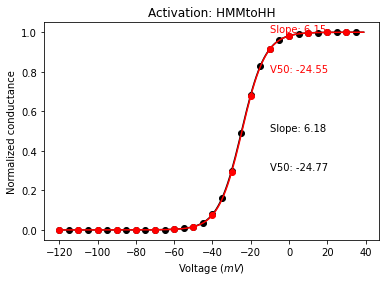

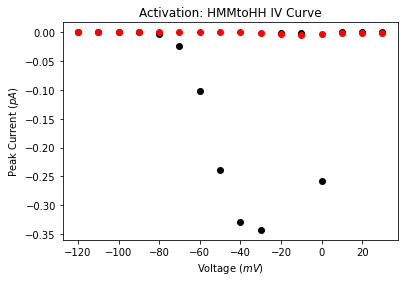

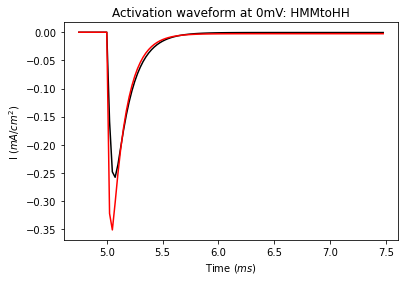

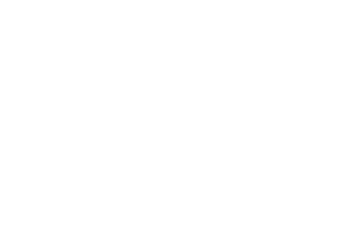

In [7]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

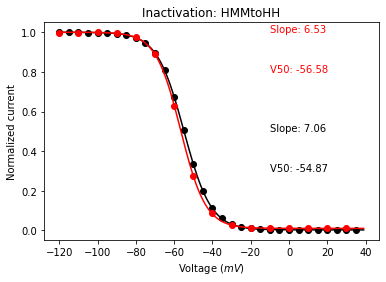

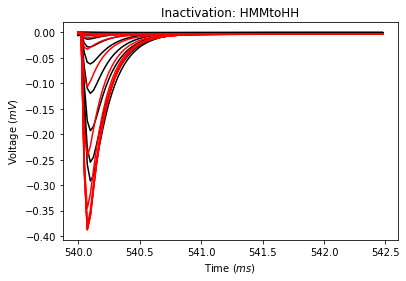

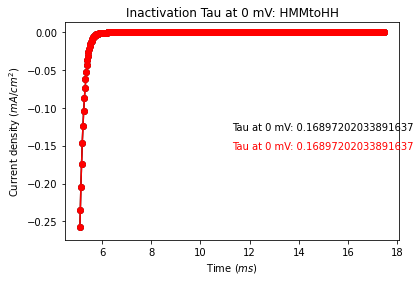

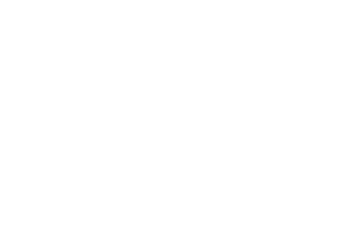

In [8]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')